# 1. Installing Obspy and preparing our codes

## 1.1 Install obspy

In [ ]:
import sys

if 'google.colab' in sys.modules:
    !pip install obspy obsplus pyproj segyio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 835.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.41
    Uninstalling SQLAlchemy-2.0.41:
      Successfully uninstalled SQLAlchemy-2.0.41
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.
thinc 8.3.6

## 1.2. Clone Field Camp II Library (fc2)

In [ ]:
!git clone https://github.com/ecastillot/FieldCampII_2025.git /content/FieldCampII_2025

fatal: destination path '/content/FieldCampII_2025' already exists and is not an empty directory.


In [ ]:
import sys
lib = "/content/FieldCampII_2025"
sys.path.append(lib)

# 1.3. Test

In [ ]:
from obspy import UTCDateTime # obspy
from fc2.seismic import read_shots #fc2

# 2. Installing Seismic Unix

## 2.1. Install dependencies

In [ ]:
# Step 1: Install dependencies
!apt-get update

!apt-get install -y --reinstall -y build-essential make gcc gfortran libtirpc-dev libmotif-dev\
    libx11-dev libxt-dev libxext-dev xorg libxaw7-dev libtirpc-dev \
    xvfb x11-utils git wget imagemagick ghostscript

# Download Seismic Unix (version 44R23 as an example, check for the latest)
!mkdir /content/SU
!wget "https://nextcloud.seismic-unix.org/s/LZpzc8jMzbWG9BZ/download?path=/&files=cwp_su_all_44R28.tgz" -O /content/SU/cwp_su_all_44R28.tgz
!tar -xzf /content/SU/cwp_su_all_44R28.tgz -C /content/SU

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,759 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,984 kB]
Get:13 https://r2u.stat.illinois.edu/ubunt

## 2.2 Install SU

In [ ]:
import os
os.environ['CWPROOT'] = '/content/SU'
os.environ['PATH'] += f":{os.environ['CWPROOT']}/bin"

In [ ]:
# Step 4: Compile core tools
!cp /content/SU/src/configs/Makefile.config_Linux_Ubuntu_22.04 /content/SU/src/Makefile.config
%cd /content/SU/src
!make clean
!make install
!make xtinstall

/content/SU/src
make: *** No rule to make target 'clean'.  Stop.
Installing the CWP codes under the ROOT = /content/SU
Continue install? [y/n] y
/content/SU


################################################################
####### Legal Statement for 25 March 2022 Release 44R24 of CWP/SU #######
################################################################

hit return key to continue

This file is property of the Colorado School of Mines.

Copyright � 2008, Colorado School of Mines,
All rights reserved.


Redistribution and use in source and binary forms, with or 
without modification, are permitted provided that the following 
conditions are met:

    *  Redistributions of source code must retain the above copyright 
       notice, this list of conditions and the following disclaimer.
    *  Redistributions in binary form must reproduce the above 
       copyright notice, this list of conditions and the following 
       disclaimer in the documentation and/or other materials provi

## 2.3. Test

In [ ]:
!gs -dSAFER -dBATCH -dNOPAUSE -sDEVICE=png16m -r150 -sOutputFile=/content/supswigb.png /content/supswigb.eps

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Error: /undefinedfilename in (/content/supswigb.eps)
Operand stack:

Execution stack:
   %interp_exit   .runexec2   --nostringval--   --nostringval--   --nostringval--   2   %stopped_push   --nostringval--   --nostringval--   --nostringval--   false   1   %stopped_push
Dictionary stack:
   --dict:765/1123(ro)(G)--   --dict:0/20(G)--   --dict:75/200(L)--
Current allocation mode is local
Last OS error: No such file or directory
GPL Ghostscript 9.55.0: Unrecoverable error, exit code 1


 								
 A2B - convert ascii floats to binary 				
 								
 a2b <stdin >stdout outpar=/dev/null 				
 								
 Required parameters:						
 	none							
 								
 Optional parameters:						
 	n1=2		floats per line in input file		
 								
 	outpar=/dev/null output parameter file, contains the	
			number of lines (n=)			
 			other choices for outpar are: /dev/tty,	
 			/dev/stderr, or a name of a disk file	

/content/SU/bin/pswigb: clip=3

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Loading NimbusSans-Regular font from /usr/share/ghostscript/9.55.0/Resource/Font/NimbusSans-Regular... 4486476 2932876 1609392 314512 2 done.
Loading NimbusSans-Bold font from /usr/share/ghostscript/9.55.0/Resource/Font/NimbusSans-Bold... 4552588 3117904 1629592 323226 2 done.


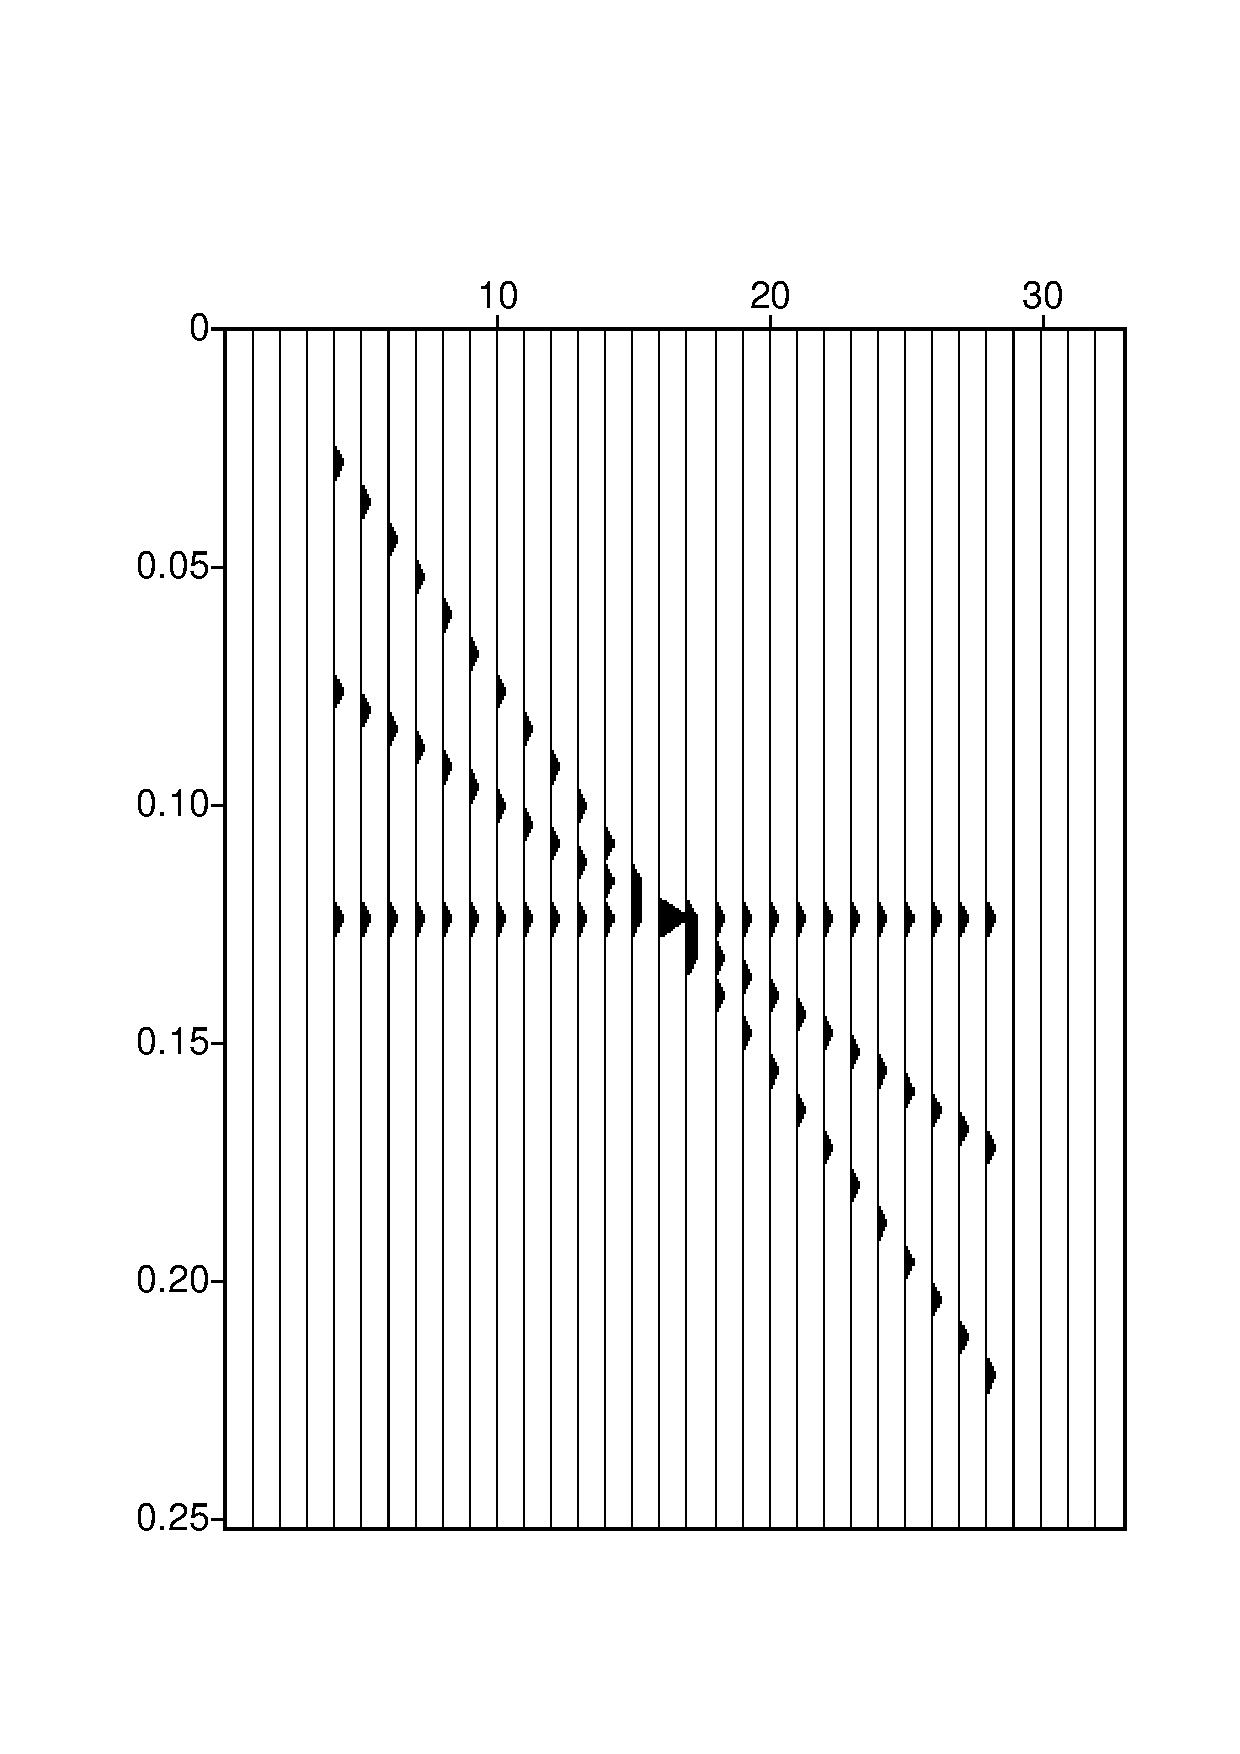

In [ ]:
os.environ['PATH']
! a2b
! suplane | supswigb > /content/supswigb.eps
!gs -dSAFER -dBATCH -dNOPAUSE -sDEVICE=png16m -r150 -sOutputFile=/content/supswigb.png /content/supswigb.eps
from IPython.display import Image, display

display(Image("/content/supswigb.png"))

# 3. Read data & Convert to SU format

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from fc2.seismic import read_shots,get_station_from_solo,append_xy_coords

PROJECT = '/content/FC2_reflection'

SHOT_folder = os.path.join(PROJECT,'SHOT') # for shots
STA_folder = os.path.join(PROJECT,'STA') # for stations
WAV_folder = os.path.join(PROJECT,'WAV') # for waveform
PROC_folder = os.path.join(PROJECT,'PROC') # for processing
os.makedirs(SHOT_folder,exist_ok=True)
os.makedirs(STA_folder,exist_ok=True)
os.makedirs(WAV_folder,exist_ok=True)
os.makedirs(PROC_folder,exist_ok=True)

## 3.1 Shots

### 3.1.1 Native Smartsolo Shots file

The native SmartSolo shots file looks like this:

In [ ]:
shots_path = "/content/FieldCampII_2025/data/ROC_S_050725/SourceTesting/TB_INT00142.csv"
print(f"Content in {shots_path}\n")
with open(shots_path) as f:
    for i in range(11):
        line = f.readline()
        print(line.strip())
print('...')

Content in /content/FieldCampII_2025/data/ROC_S_050725/SourceTesting/TB_INT00142.csv

week=2365,ms=315255879,Subms=373058
Longitude: 96.75810 W  Latitude: 32.98688 N

week=2365,ms=316410402,Subms=446859
Longitude: 96.75804 W  Latitude: 32.98691 N

week=2365,ms=316416822,Subms=524974
Longitude: 96.75804 W  Latitude: 32.98691 N

week=2365,ms=316422495,Subms=557254
Longitude: 96.75804 W  Latitude: 32.98691 N
...


### 3.1.2 Readable Smartsolo Shots file

We need to convert it to readable format. Let's convert it to csv (separated by comma) format

In [ ]:
name, ext = os.path.splitext(os.path.basename(shots_path))
shots_fc2_path = os.path.join(SHOT_folder,f'{name}_fc2_src.csv')

shots_elevation = 210

# read shots function
shots_df = read_shots(shots_path)
shots_df = append_xy_coords(shots_df,lat_col='latitude', lon_col='longitude', epsg="epsg:32614")
shots_df["elevation_m"] = shots_elevation
shots_df.to_csv(shots_fc2_path,index=False)
print(f'Conversion: {shots_path} -> {shots_fc2_path}')
display(shots_df)

Conversion: /content/FieldCampII_2025/data/ROC_S_050725/SourceTesting/TB_INT00142.csv -> /content/FC2_reflection/SHOT/TB_INT00142_fc2_src.csv


,shot,year,month,day,hour,minute,second,latitude,longitude,x,y,elevation_m
0,1,2025,5,7,15,34,16.25,32.98688,-96.75810,709481.883181,3.652064e+06,210
1,2,2025,5,7,15,53,30.85,32.98691,-96.75804,709487.419809,3.652068e+06,210
2,3,2025,5,7,15,53,37.35,32.98691,-96.75804,709487.419809,3.652068e+06,210
3,4,2025,5,7,15,53,43.05,32.98691,-96.75804,709487.419809,3.652068e+06,210
4,5,2025,5,7,15,53,49.00,32.98691,-96.75804,709487.419809,3.652068e+06,210
...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,2025,5,7,16,14,57.99,32.98692,-96.75829,709464.031432,3.652069e+06,210
151,152,2025,5,7,16,15,2.83,32.98692,-96.75830,709463.096842,3.652069e+06,210
152,153,2025,5,7,16,15,7.72,32.98692,-96.75830,709463.096842,3.652069e+06,210
153,154,2025,5,7,16,15,11.96,32.98692,-96.75830,709463.096842,3.652069e+06,210


### 3.1.3 Seismic Unix Source file

Now it's time to convert that to SU format

In [ ]:
xy_scale = 100

# Extract directory and filename
shots_dir = os.path.dirname(shots_fc2_path)
filename = os.path.basename(shots_fc2_path)
name_no_ext = os.path.splitext(filename)[0]

# Construct shell command using raw string and correct escaping
cmd = f"""
cd "{shots_dir}" && \
awk -F"," 'NR>1 {{printf "%d %10.5f %10.5f %10.1f\\n", $1, $10*{xy_scale}, $11*{xy_scale}, $12*{xy_scale}}}' "{filename}" > "{name_no_ext}.txt" && \
a2b < "{name_no_ext}.txt" > "{name_no_ext}.bin" n1=4
"""
#print(cmd)
os.system(cmd)

print(f"List of files in {SHOT_folder} ->",os.listdir(SHOT_folder))

List of files in /content/FC2_reflection/SHOT -> ['TB_INT00142_fc2_src.bin', 'TB_INT00142_fc2_src.csv', 'TB_INT00142_fc2_src.txt']


## 3.2 Geometry (from raw smartsolo)

In [ ]:
name, ext = os.path.splitext(os.path.basename(shots_path))
shots_fc2_path = os.path.join(SHOT_folder,f'{name}_fc2_src.csv')

In [ ]:
xy_scale = 100
solo_folder = "/content/FieldCampII_2025/data/ROC_S_050725/Pwaveseismic_Solo"

stations_path = os.path.join(STA_folder,f'stations.csv')

stations = get_station_from_solo(solo_folder)
stations = append_xy_coords(stations,lat_col='latitude', lon_col='longitude', epsg="epsg:32614")
stations["elevation_m"] = stations["elevation"]
stations.to_csv(stations_path,index=False)
print(f"List of files in {STA_folder} ->",os.listdir(STA_folder))
display(stations)

List of files in /content/FC2_reflection/STA -> ['stations.csv']


,station,latitude,longitude,elevation,path,x,y,elevation_m
0,453024638,32.986914,-96.758094,205.150,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709482.371177,3.652068e+06,205.150
1,453025931,32.986914,-96.758151,204.875,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709477.039302,3.652068e+06,204.875
2,453024341,32.986922,-96.758215,212.800,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709471.054923,3.652069e+06,212.800
3,453026205,32.986915,-96.758117,205.375,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709480.246008,3.652068e+06,205.375
4,453024131,32.986924,-96.758282,212.100,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709464.772885,3.652069e+06,212.100
5,453024589,32.986919,-96.758235,212.125,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709469.161174,3.652069e+06,212.125
6,453026125,32.986918,-96.758206,210.525,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709471.890712,3.652068e+06,210.525
7,453025954,32.986914,-96.758158,203.975,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709476.385090,3.652068e+06,203.975
8,453026138,32.986913,-96.758172,205.675,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709475.083544,3.652068e+06,205.675
9,453026107,32.986922,-96.758228,211.650,/content/FieldCampII_2025/data/ROC_S_050725/Pw...,709469.804394,3.652069e+06,211.650


In [ ]:
xy_scale = 100

# Extract directory and filename
shots_dir = os.path.dirname(stations_path)
filename = os.path.basename(stations_path)
name_no_ext = os.path.splitext(filename)[0]

# Construct shell command using raw string and correct escaping
cmd = f"""
cd "{shots_dir}" && \
awk -F"," 'NR>1 {{printf "%10.5f %10.5f %10.1f\\n", $6*{xy_scale}, $7*{xy_scale}, $8*{xy_scale}}}' "{filename}" > "{name_no_ext}.txt" && \
a2b < "{name_no_ext}.txt" > "{name_no_ext}.bin" n1=4
"""
#print(cmd)
os.system(cmd)

print(f"List of files in {SHOT_folder} ->",os.listdir(SHOT_folder))

List of files in /content/FC2_reflection/SHOT -> ['TB_INT00142_fc2_src.bin', 'TB_INT00142_fc2_src.csv', 'TB_INT00142_fc2_src.txt']


## 3.3 Waveforms

### 3.3.1 Exploring the data

Number of traces: 1017
Samples per trace: 6001


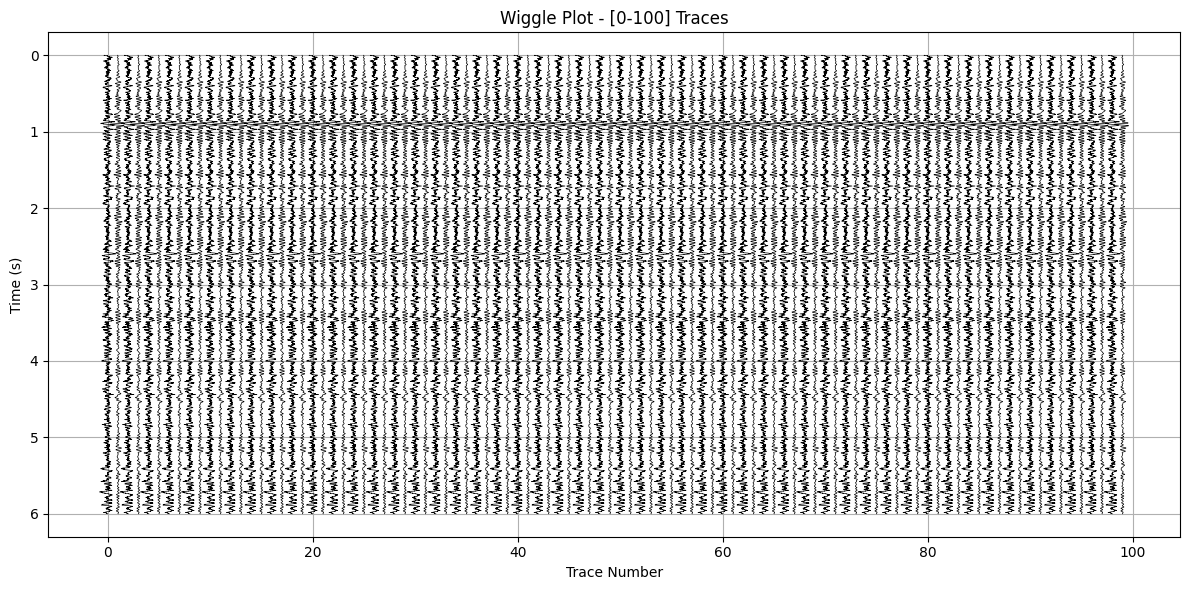

In [71]:
seg_path = "/content/FieldCampII_2025/data/ROC_S_050725/ROC_2025_SEGY/453024131.0001.2025.05.07.15.42.27.000.ENZ.segy"

start_tr = 0
end_tr = 100

with segyio.open(seg_path, "r", ignore_geometry=True) as f:
    print(f"Number of traces:", f.tracecount)
    print(f"Samples per trace:", f.samples.size)

    dt_ms = segyio.dt(f) / 1000  # dt in milliseconds
    traces = list(f.trace[start_tr:end_tr])  # Convert generator to list
    traces = np.array(traces)         # Convert to numpy array

    n_samples = traces.shape[1]
    time = np.arange(n_samples) * (dt_ms / 1000)  # time in seconds

    plt.figure(figsize=(12, 6))
    scale = 0.8  # Adjust for better spacing

    for i in range(end_tr-start_tr):
        trace = traces[i]
        trace = trace / np.max(np.abs(trace))  # normalize
        plt.plot(start_tr + trace * scale + i, time, color='black', linewidth=0.5)

    plt.gca().invert_yaxis()
    plt.title(f"Wiggle Plot - [{start_tr}-{end_tr}] Traces")
    plt.xlabel("Trace Number")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Number of traces: 1005
Samples per trace: 6001


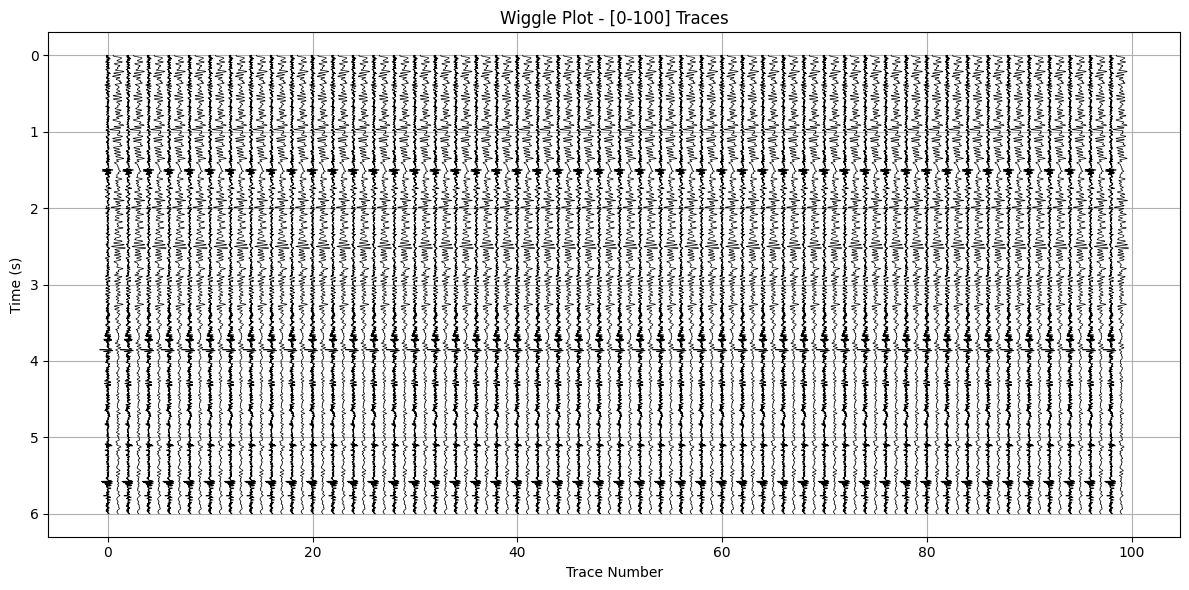

In [72]:
seg_path = "/content/FieldCampII_2025/data/ROC_S_050725/ROC_2025_SEGY/453024311.0001.2025.05.07.15.43.48.000.ENZ.segy"

start_tr = 0
end_tr = 100

with segyio.open(seg_path, "r", ignore_geometry=True) as f:
    print(f"Number of traces:", f.tracecount)
    print(f"Samples per trace:", f.samples.size)

    dt_ms = segyio.dt(f) / 1000  # dt in milliseconds
    traces = list(f.trace[start_tr:end_tr])  # Convert generator to list
    traces = np.array(traces)         # Convert to numpy array

    n_samples = traces.shape[1]
    time = np.arange(n_samples) * (dt_ms / 1000)  # time in seconds

    plt.figure(figsize=(12, 6))
    scale = 0.8  # Adjust for better spacing

    for i in range(end_tr-start_tr):
        trace = traces[i]
        trace = trace / np.max(np.abs(trace))  # normalize
        plt.plot(start_tr + trace * scale + i, time, color='black', linewidth=0.5)

    plt.gca().invert_yaxis()
    plt.title(f"Wiggle Plot - [{start_tr}-{end_tr}] Traces")
    plt.xlabel("Trace Number")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Number of traces: 1023
Samples per trace: 6001


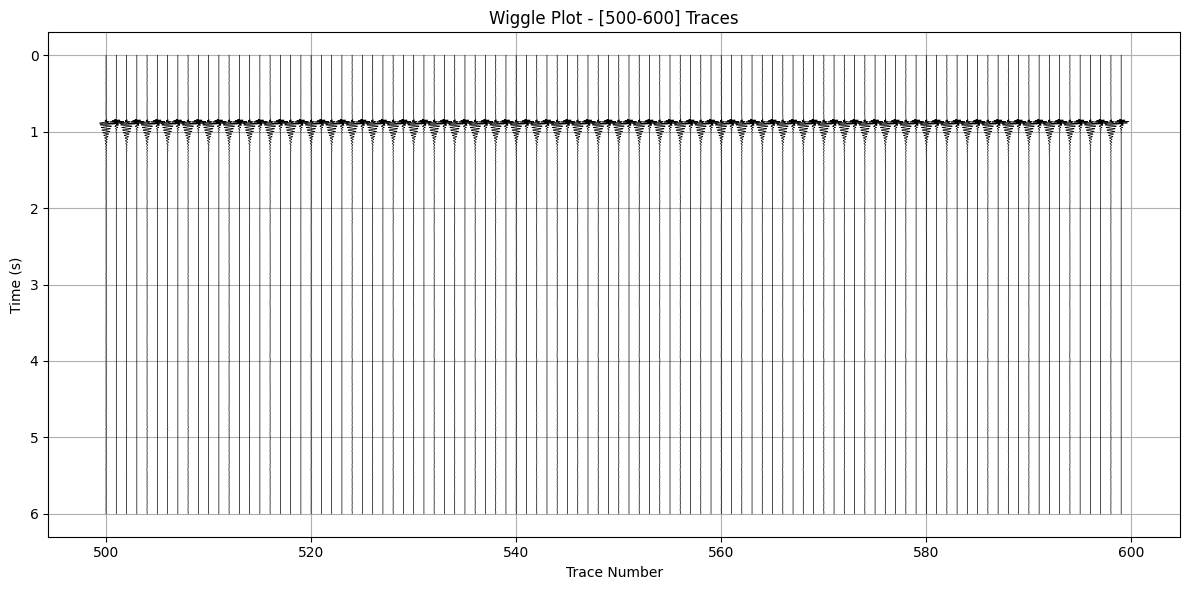

In [75]:
seg_path = "/content/FieldCampII_2025/data/ROC_S_050725/ROC_2025_SEGY/453026205.0001.2025.05.07.15.44.21.000.ENZ.segy"

start_tr = 500
end_tr = 600

with segyio.open(seg_path, "r", ignore_geometry=True) as f:
    print(f"Number of traces:", f.tracecount)
    print(f"Samples per trace:", f.samples.size)

    dt_ms = segyio.dt(f) / 1000  # dt in milliseconds
    traces = list(f.trace[start_tr:end_tr])  # Convert generator to list
    traces = np.array(traces)         # Convert to numpy array

    n_samples = traces.shape[1]
    time = np.arange(n_samples) * (dt_ms / 1000)  # time in seconds

    plt.figure(figsize=(12, 6))
    scale = 0.8  # Adjust for better spacing

    for i in range(end_tr-start_tr):
        trace = traces[i]
        trace = trace / np.max(np.abs(trace))  # normalize
        plt.plot(start_tr + trace * scale + i, time, color='black', linewidth=0.5)

    plt.gca().invert_yaxis()
    plt.title(f"Wiggle Plot - [{start_tr}-{end_tr}] Traces")
    plt.xlabel("Trace Number")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Number of traces: 1017
Samples per trace: 6001


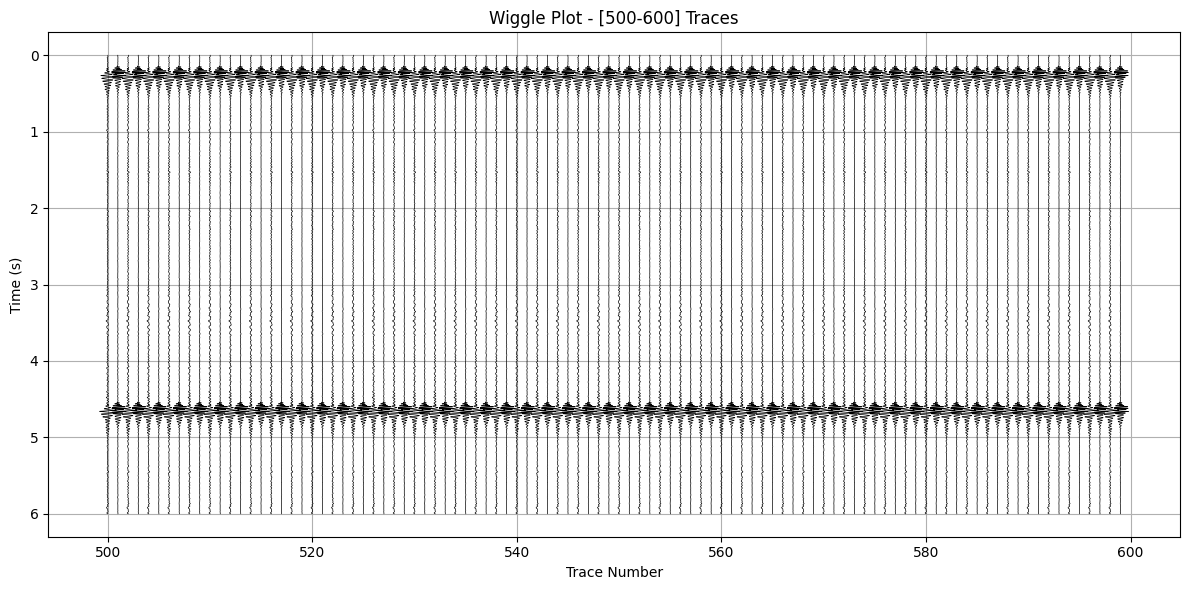

In [70]:
seg_path = "/content/FieldCampII_2025/data/ROC_S_050725/ROC_2025_SEGY/453024131.0001.2025.05.07.15.42.27.000.ENZ.segy"

start_tr = 500
end_tr = 600

with segyio.open(seg_path, "r", ignore_geometry=True) as f:
    print(f"Number of traces:", f.tracecount)
    print(f"Samples per trace:", f.samples.size)

    dt_ms = segyio.dt(f) / 1000  # dt in milliseconds
    traces = list(f.trace[start_tr:end_tr])  # Convert generator to list
    traces = np.array(traces)         # Convert to numpy array

    n_samples = traces.shape[1]
    time = np.arange(n_samples) * (dt_ms / 1000)  # time in seconds

    plt.figure(figsize=(12, 6))
    scale = 0.8  # Adjust for better spacing

    for i in range(end_tr-start_tr):
        trace = traces[i]
        trace = trace / np.max(np.abs(trace))  # normalize
        plt.plot(start_tr + trace * scale + i, time, color='black', linewidth=0.5)

    plt.gca().invert_yaxis()
    plt.title(f"Wiggle Plot - [{start_tr}-{end_tr}] Traces")
    plt.xlabel("Trace Number")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 3.3.2 Convert SEGY to SU Format

In [35]:
segy_dir = "/content/FieldCampII_2025/data/ROC_S_050725/ROC_2025_SEGY"

for file in os.listdir(segy_dir):
    if file.endswith(".segy"):
        base = os.path.splitext(file)[0]
        out_wav_path = os.path.join(WAV_folder,f'{base}.su')
        #read, Sets the fldr (field record number) to 1 for all traces.
        #Sets the ep (ensemble/shot number) to 1,
        #Sets tracf (trace number within field record) to 1
        cmd = f"""
        cd {segy_dir} && \
        segyread tape={file} | \
        sushw key=fldr a=1 | \
        sushw key=ep a=1 | \
        suputhead key=tracf a=1 > {out_wav_path}
        """
        #print(cmd)
        os.system(cmd)

print(f"List of files in {WAV_folder} ->",os.listdir(WAV_folder))


List of files in /content/FC2_reflection/WAV -> ['453026138.0001.2025.05.07.15.44.54.000.ENZ.su', '453026218.0001.2025.05.07.15.43.21.000.ENZ.su', '453024131.0001.2025.05.07.15.42.27.000.ENZ.su', '453026207.0001.2025.05.07.15.43.54.000.ENZ.su', '453026176.0001.2025.05.07.15.44.15.000.ENZ.su', '453025794.0001.2025.05.07.15.41.51.000.ENZ.su', '453024341.0001.2025.05.07.15.43.48.000.ENZ.su', '453026125.0001.2025.05.07.15.43.57.000.ENZ.su', '453024624.0001.2025.05.07.15.43.54.000.ENZ.su', '453026226.0001.2025.05.07.15.42.57.000.ENZ.su', '453025931.0001.2025.05.07.15.45.11.000.ENZ.su', '453026190.0001.2025.05.07.15.44.27.000.ENZ.su', '453026144.0001.2025.05.07.15.44.24.000.ENZ.su', '453024638.0001.2025.05.07.15.44.24.000.ENZ.su', '453025954.0001.2025.05.07.15.44.51.000.ENZ.su', '453026165.0001.2025.05.07.15.44.42.000.ENZ.su', '453026185.0001.2025.05.07.15.44.51.000.ENZ.su', '453026205.0001.2025.05.07.15.44.21.000.ENZ.su', '453024311.0001.2025.05.07.15.43.48.000.ENZ.su', '453026107.0001.2025

# 4 Processing

## 4.1 Sort and Stack (CDP Processing)